In [1]:
# import numpy as np
from Layers import *
from Activations import *
from Losses import *
from Optimizers import *
from Models import *
from Metrics import *
from Datasets import *

import matplotlib.pyplot as plt

In [2]:
dataset = Goog()
data = dataset.get_data()

In [3]:
print(len(data["trn"]["X"]))

1


In [4]:
# Instantiate the model
model = GraphModel()

#### Add layers
l1 = GraphDense(32, Sigmoid())
l2 = GraphDense(32, Sigmoid())
l3 = GraphDense(32, Sigmoid())
l4 = GraphDense(32, Sigmoid())
l5 = GraphDense(32, Sigmoid())
l6 = GraphDense(32, Sigmoid())
l7 = GraphDense(1, Sigmoid())
g = {
    l1: [l1, l2, l7],
    l2: [l1, l2, l3],
    l3: [l2, l3, l4],
    l4: [l3, l4, l5],
    l5: [l4, l5, l6],
    l6: [l5, l6, l7],
    l7: [l6, l7, l1]
}
model.add(g, [l1], [l7], 1)

In [5]:
#### Add layers
l1 = GraphDense(16, Sigmoid())  # , weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
l2 = GraphDense(4, Sigmoid())
l3 = GraphDense(1, Linear())
g = {
    l1: [],
    l2: [l1, l2],
    l3: [l2]
}
model.add(g, [l1], [l3], dataset.f_set_size) # give datasets a feature count field

In [6]:
# Set loss, optimizer and accuracy objects
model.set(
    loss=MeanSquaredError(),
    optimizer=GAdam(learning_rate=0.02, decay=5e-5),
    accuracy=Accuracy_Regression()
)

# Finalize the model
model.finalize()

i = 0

model.train(data["trn"]["X"], data["trn"]["Y"],
            validation_data=(data["val"]["X"], data["val"]["Y"]),
            epochs=1,  # batch_size=1,
            time_series=True,
            print_every=1)

print("loop# ", i)
display_predictions(model, "trn")
display_predictions(model, "val")
i +=1

In [7]:
# Train the model
model.train(data["trn"]["X"], data["trn"]["Y"],
            validation_data=(data["val"]["X"], data["val"]["Y"]),
            epochs=2,
            time_series=True,
            print_every=1)

epoch: 1, acc: 0.000, loss: 0.637 (data_loss: 0.637, reg_loss: 0.000), lr: 0.02
epoch: 2, acc: 0.000, loss: 5.830 (data_loss: 5.830, reg_loss: 0.000), lr: 0.0199990000499975
validation, acc: 0.004, loss: 0.978


In [8]:
cop = model.copy()

In [9]:
def display_predictions(predictor, d_set):
    pred = predictor.predict(data[d_set]["X"][0])
    pred = np.reshape(np.array(pred), (pred.shape[0],))
    fig, ax = plt.subplots()
    ax.plot(range(pred.shape[0]), pred, label="pred")
    ax.plot(range(data[d_set]["Y"][-1].shape[0]), data[d_set]["Y"][-1], label="truth")
    ax.legend()
    ax.set_title(d_set)

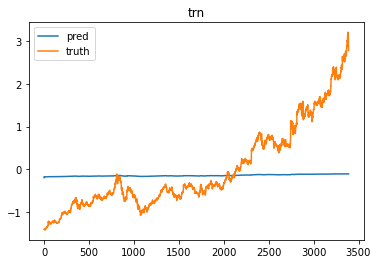

In [10]:
display_predictions(model, "trn")

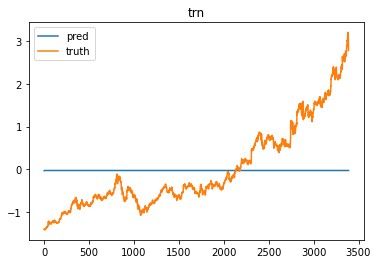

In [11]:
display_predictions(cop, "trn")

In [12]:
cop.train(data["trn"]["X"], data["trn"]["Y"],
            validation_data=(data["val"]["X"], data["val"]["Y"]),
            epochs=2,  # batch_size=1,
            time_series=True,
            print_every=1)

epoch: 1, acc: 0.000, loss: 4.432 (data_loss: 4.432, reg_loss: 0.000), lr: 0.02
epoch: 2, acc: 0.000, loss: 4.907 (data_loss: 4.907, reg_loss: 0.000), lr: 0.0199990000499975
validation, acc: 0.005, loss: 0.891


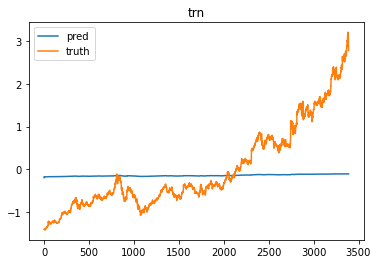

In [13]:
display_predictions(model, "trn")

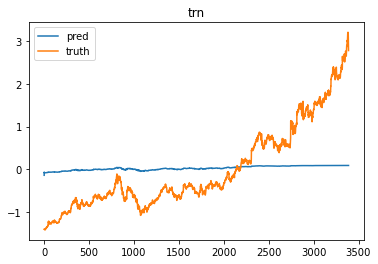

In [14]:
display_predictions(cop, "trn")

In [15]:
model.train(data["trn"]["X"], data["trn"]["Y"],
            validation_data=(data["val"]["X"], data["val"]["Y"]),
            epochs=2,  # batch_size=1,
            time_series=True,
            print_every=1)

epoch: 1, acc: 0.000, loss: 5.511 (data_loss: 5.511, reg_loss: 0.000), lr: 0.019998000199980003
epoch: 2, acc: 0.000, loss: 5.338 (data_loss: 5.338, reg_loss: 0.000), lr: 0.01999700044993251
validation, acc: 0.009, loss: 0.897


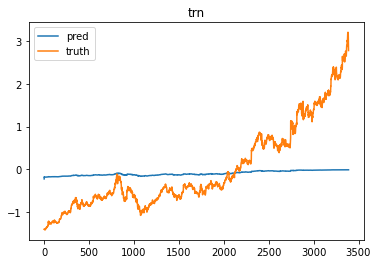

In [16]:
display_predictions(model, "trn")

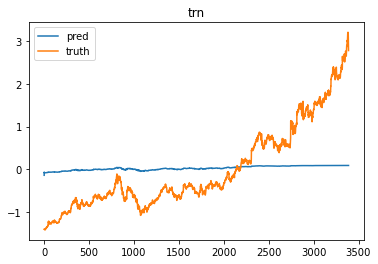

In [17]:
display_predictions(cop, "trn")

In [18]:
l4 = GraphDense(12, Relu())
g[l4] = [l1]
g[l3] = [l2, l4]
model.add(g)

In [19]:
model.train(data["trn"]["X"], data["trn"]["Y"],
            validation_data=(data["val"]["X"], data["val"]["Y"]),
            epochs=2,  # batch_size=1,
            time_series=True,
            print_every=1)

epoch: 1, acc: 0.000, loss: 5.200 (data_loss: 5.200, reg_loss: 0.000), lr: 0.019996000799840034
epoch: 2, acc: 0.000, loss: 5.000 (data_loss: 5.000, reg_loss: 0.000), lr: 0.019995001249687578
validation, acc: 0.009, loss: 0.767


In [20]:
cop.train(data["trn"]["X"], data["trn"]["Y"],
            validation_data=(data["val"]["X"], data["val"]["Y"]),
            epochs=2,  # batch_size=1,
            time_series=True,
            print_every=1)

epoch: 1, acc: 0.000, loss: 4.565 (data_loss: 4.565, reg_loss: 0.000), lr: 0.019998000199980003
epoch: 2, acc: 0.000, loss: 4.114 (data_loss: 4.114, reg_loss: 0.000), lr: 0.01999700044993251
validation, acc: 0.021, loss: 0.486


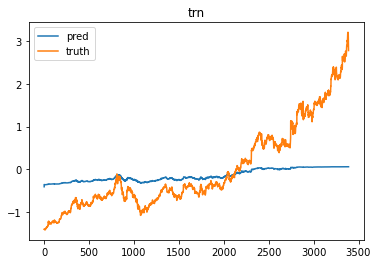

In [21]:
display_predictions(model, "trn")

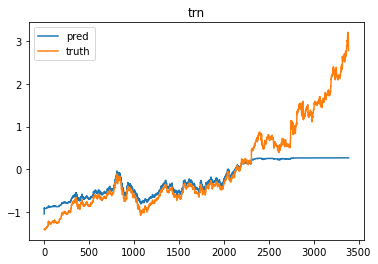

In [22]:
display_predictions(cop, "trn")

#### Prediction section

In [ ]:
pred = 0
pred = model.predict(data["trn"]["X"][0])
pred = np.reshape(np.array(pred), (pred.shape[0],))

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(pred.shape[0]), pred, label="pred")
ax.plot(range(data["trn"]["Y"][-1].shape[0]), data["trn"]["Y"][-1], label="truth")
ax.legend()
ax.set_title("Training")

In [ ]:
pred = model.predict(data["val"]["X"][0])
pred = np.reshape(np.array(pred), len(pred))
pred = np.reshape(np.array(pred), (pred.shape[0],))

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(pred.shape[0]), pred, label="pred")
ax.plot(range(data["val"]["Y"][-1].shape[0]), data["val"]["Y"][-1], label="truth")
ax.legend()
ax.set_title("Test Set 1")

In [ ]:
pred = model.predict(data["tst"]["X"][0])
pred = np.reshape(np.array(pred), len(pred))
pred = np.reshape(np.array(pred), (pred.shape[0],))

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(pred.shape[0]), pred, label="pred")
ax.plot(range(data["tst"]["Y"][0].shape[0]), data["tst"]["Y"][0], label ="truth")
ax.legend()
ax.set_title("Test Set 2")

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(200, 250), pred[200:250], label="pred")
ax.plot(range(200, 250), data["tst"]["Y"][0][200:250], label ="truth")
ax.plot(range(200, 250), data["tst"]["X"][0][200:250], label ="input")
ax.legend()
ax.set_title("Test Set 2")

In [ ]:
print(data["trn"]["X"].shape)
print(data["val"]["X"].shape)
print(data["tst"]["X"].shape)

#### Foresight section

In [ ]:
doot = model.foresight(data["trn"]["X"], data["val"]["X"].shape[0])
print(doot.shape)
doot = np.reshape(np.array(doot), len(doot))
print(doot.shape)

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(doot.shape[0]), doot, label="pred")
ax.plot(range(data["trn"]["Y"].shape[0]), data["trn"]["Y"], label ="truth")
ax.legend()
ax.set_title("trainging set + foresight")

In [ ]:
doot = model.foresight(data["val"]["X"], data["tst"]["X"].shape[0])
print(doot.shape)
doot = np.reshape(np.array(doot), len(doot))
print(doot.shape)

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(doot.shape[0]), doot, label="pred")
ax.plot(range(data["val"]["Y"].shape[0]), data["val"]["Y"], label ="truth")
ax.legend()
ax.set_title("test set 1 + foresight")